#Aula 01

In [2]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

In [4]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

#Aula 02

In [0]:
from sklearn.cluster import KMeans

In [8]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


#Aula 03

In [9]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.565825,0.147132,-0.232865,-0.267692,-0.597815,0.429742,-0.215815,-0.180715,0.015417,0.189661,0.663291,0.166141,-0.176954,0.428332,-0.345871,0.499016,1.125360,-0.142904,-0.057060
1,0.038224,-0.269869,-0.211424,-0.252408,-0.270451,0.253720,-0.158641,0.137219,0.181896,-0.144073,-0.076967,-0.277837,-0.113684,0.024206,-0.186797,0.211943,-0.261979,-0.471194,0.096535,0.041045
2,-0.059180,-0.031634,0.874626,2.284818,2.503361,0.229725,-0.313560,-0.202235,-0.588077,0.853674,-0.094926,-0.277834,0.205995,0.386109,-0.133296,-0.274303,0.121945,-0.472581,-0.169377,-0.083254


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efd69a38fd0>,
      dtype=object)

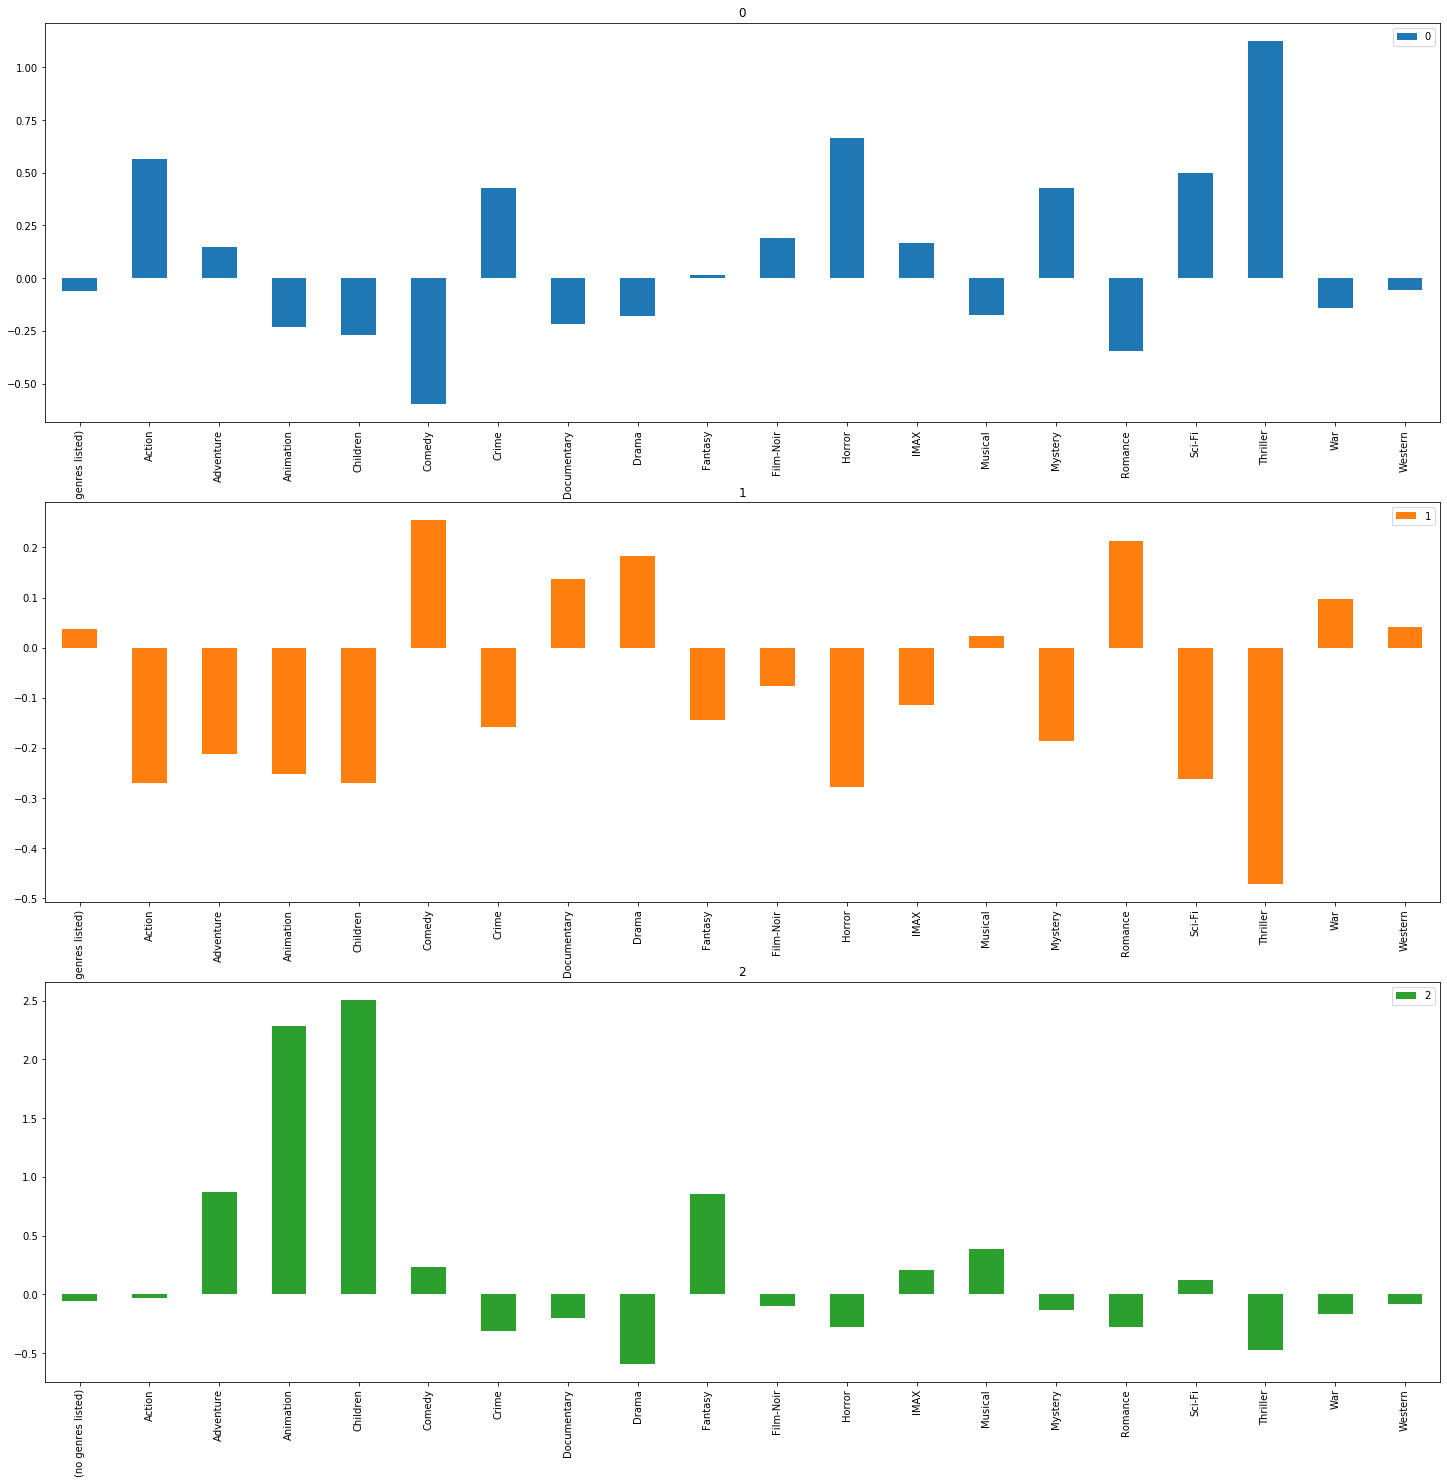

In [10]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [11]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3578,4901,Spy Game (2001),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6774,60074,Hancock (2008),Action|Adventure|Comedy|Crime|Fantasy,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1691,2273,Rush Hour (1998),Action|Comedy|Crime|Thriller,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1687,2268,"Few Good Men, A (1992)",Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3322,4497,Dead Heat (1988),Action|Comedy|Horror|Sci-Fi,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2574,3442,Band of the Hand (1986),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5733,30745,Gozu (Gokudô kyôfu dai-gekijô: Gozu) (2003),Comedy|Crime|Drama|Horror|Mystery,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0
1819,2419,Extremities (1986),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5298,8778,Sherlock Holmes: Dressed to Kill (1946),Crime|Mystery,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
6155,44199,Inside Man (2006),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [0]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 16.26434   ,  58.564045  ],
       [-52.653217  ,  12.1300745 ],
       [ 33.011803  ,  12.168573  ],
       ...,
       [ 13.63396   ,  -6.711885  ],
       [-18.832785  ,  64.51642   ],
       [-24.942797  ,   0.87377256]], dtype=float32)

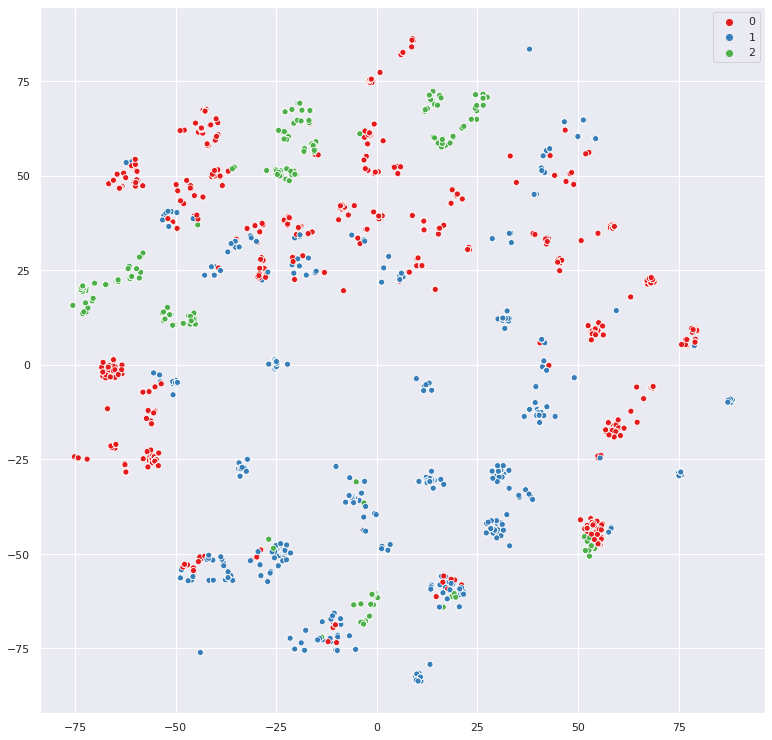

In [14]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

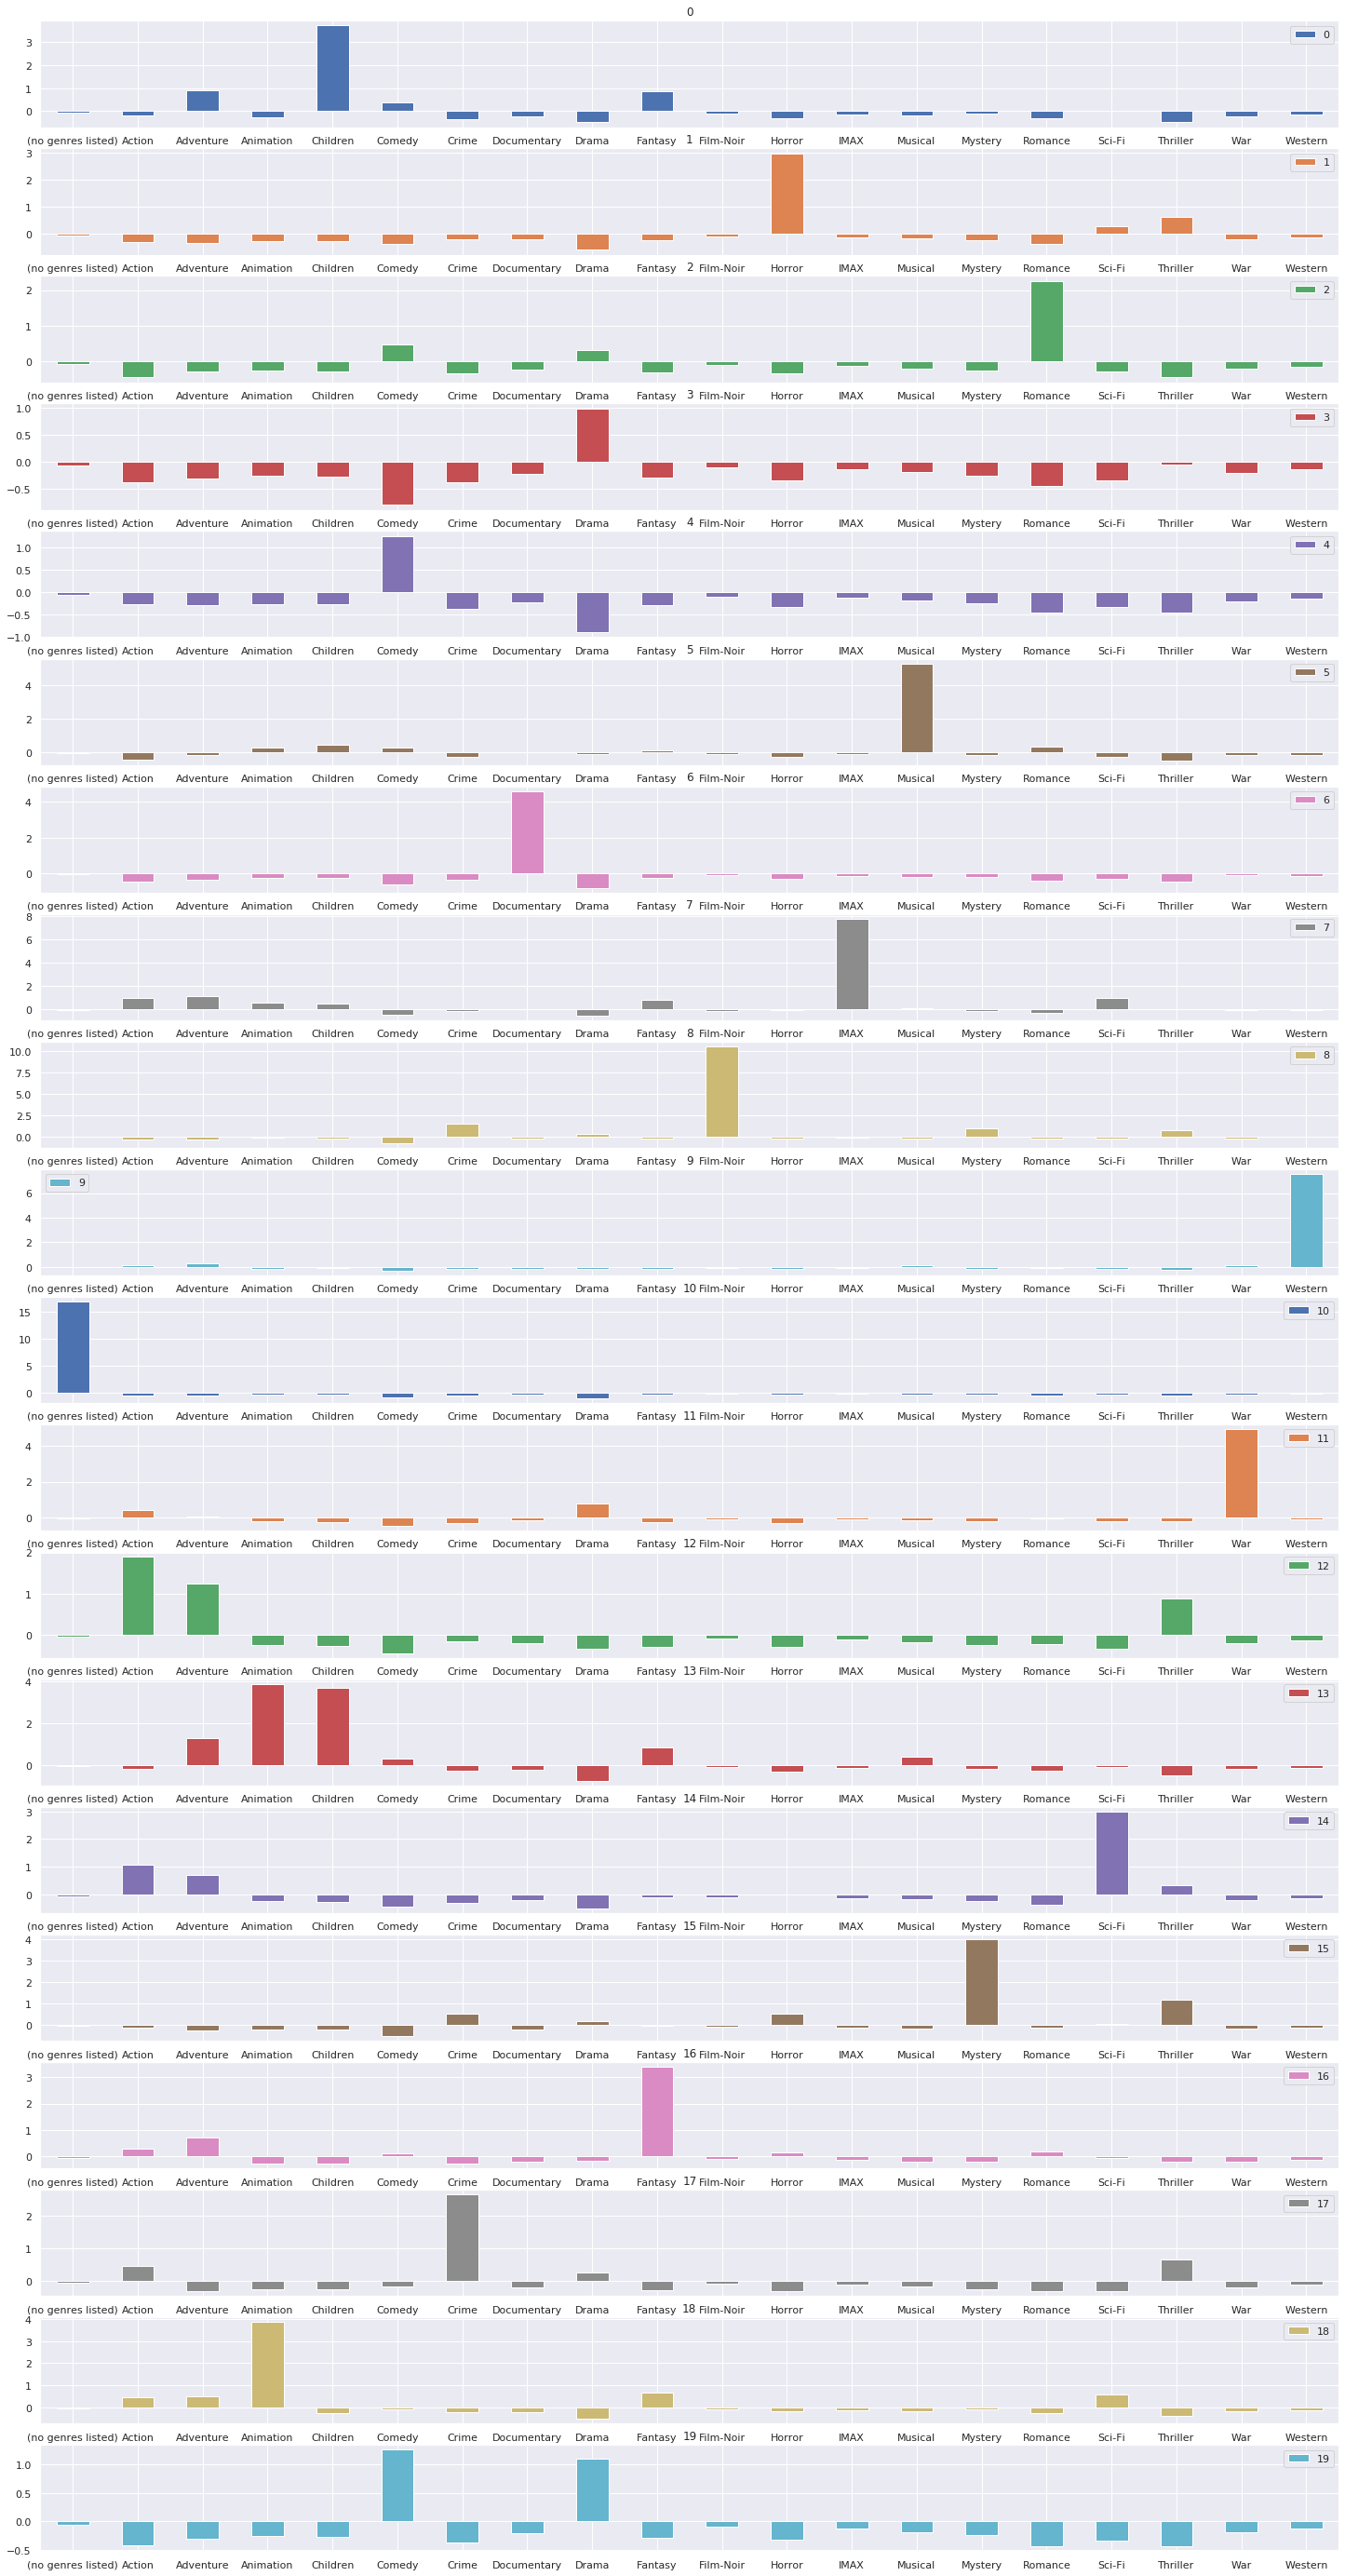

In [15]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0);

#Aula 04

In [16]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1147,1502,Kissed (1996),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1073,1393,Jerry Maguire (1996),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7621,87234,Submarine (2010),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6099,42418,"New World, The (2005)",Adventure|Drama|Romance,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8095,100302,Upside Down (2012),Drama|Romance|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3227,4357,How to Marry a Millionaire (1953),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6053,40581,Just Friends (2005),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2512,3360,Hoosiers (a.k.a. Best Shot) (1986),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6689,58162,Run Fatboy Run (2007),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4880,7311,"Goodbye, Mr. Chips (1939)",Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [17]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3340,4523,Milagro Beanfield War (1988),Comedy|Drama|Fantasy,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
6841,61401,"Spirit, The (2008)",Action|Comedy|Fantasy|Thriller,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4137,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2157,2872,Excalibur (1981),Adventure|Fantasy,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7188,72407,"Twilight Saga: New Moon, The (2009)",Drama|Fantasy|Horror|Romance|Thriller,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0
2591,3466,Heart and Souls (1993),Comedy|Fantasy,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6362,49666,Fur: An Imaginary Portrait of Diane Arbus (2006),Drama|Fantasy|Romance,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
9260,156607,The Huntsman Winter's War (2016),Action|Adventure|Drama|Fantasy,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
855,1126,Drop Dead Fred (1991),Comedy|Fantasy,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6411,51024,The Odyssey (1997),Adventure|Drama|Fantasy,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


#Aula 05

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [20]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 47.47971  ,  43.86715  ],
       [ 11.773957 ,  46.033543 ],
       [ 29.722097 ,  -4.1607237],
       ...,
       [ 12.921069 ,  16.485477 ],
       [ 50.15705  ,  20.265026 ],
       [-18.986475 ,  -3.282569 ]], dtype=float32)

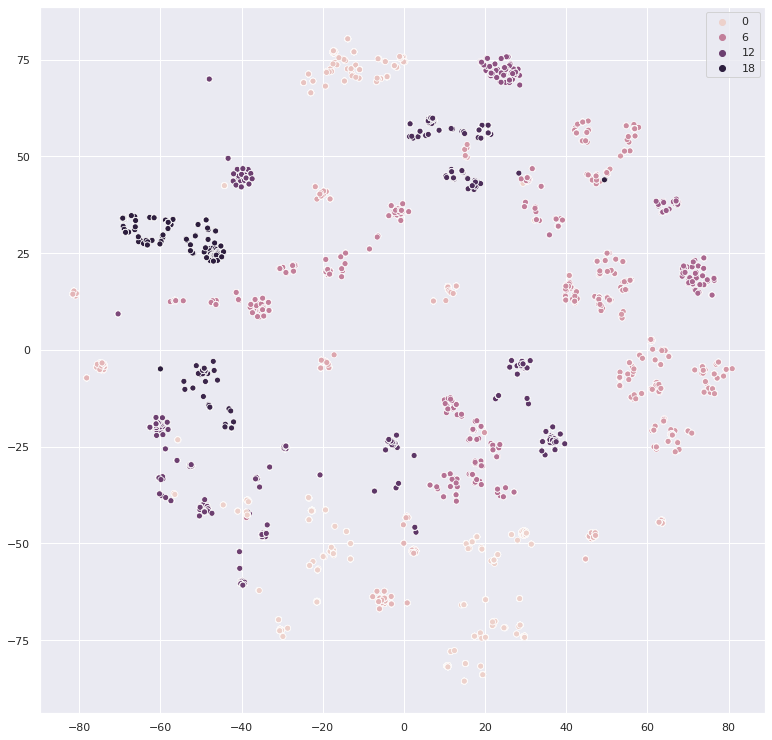

In [21]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos);

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

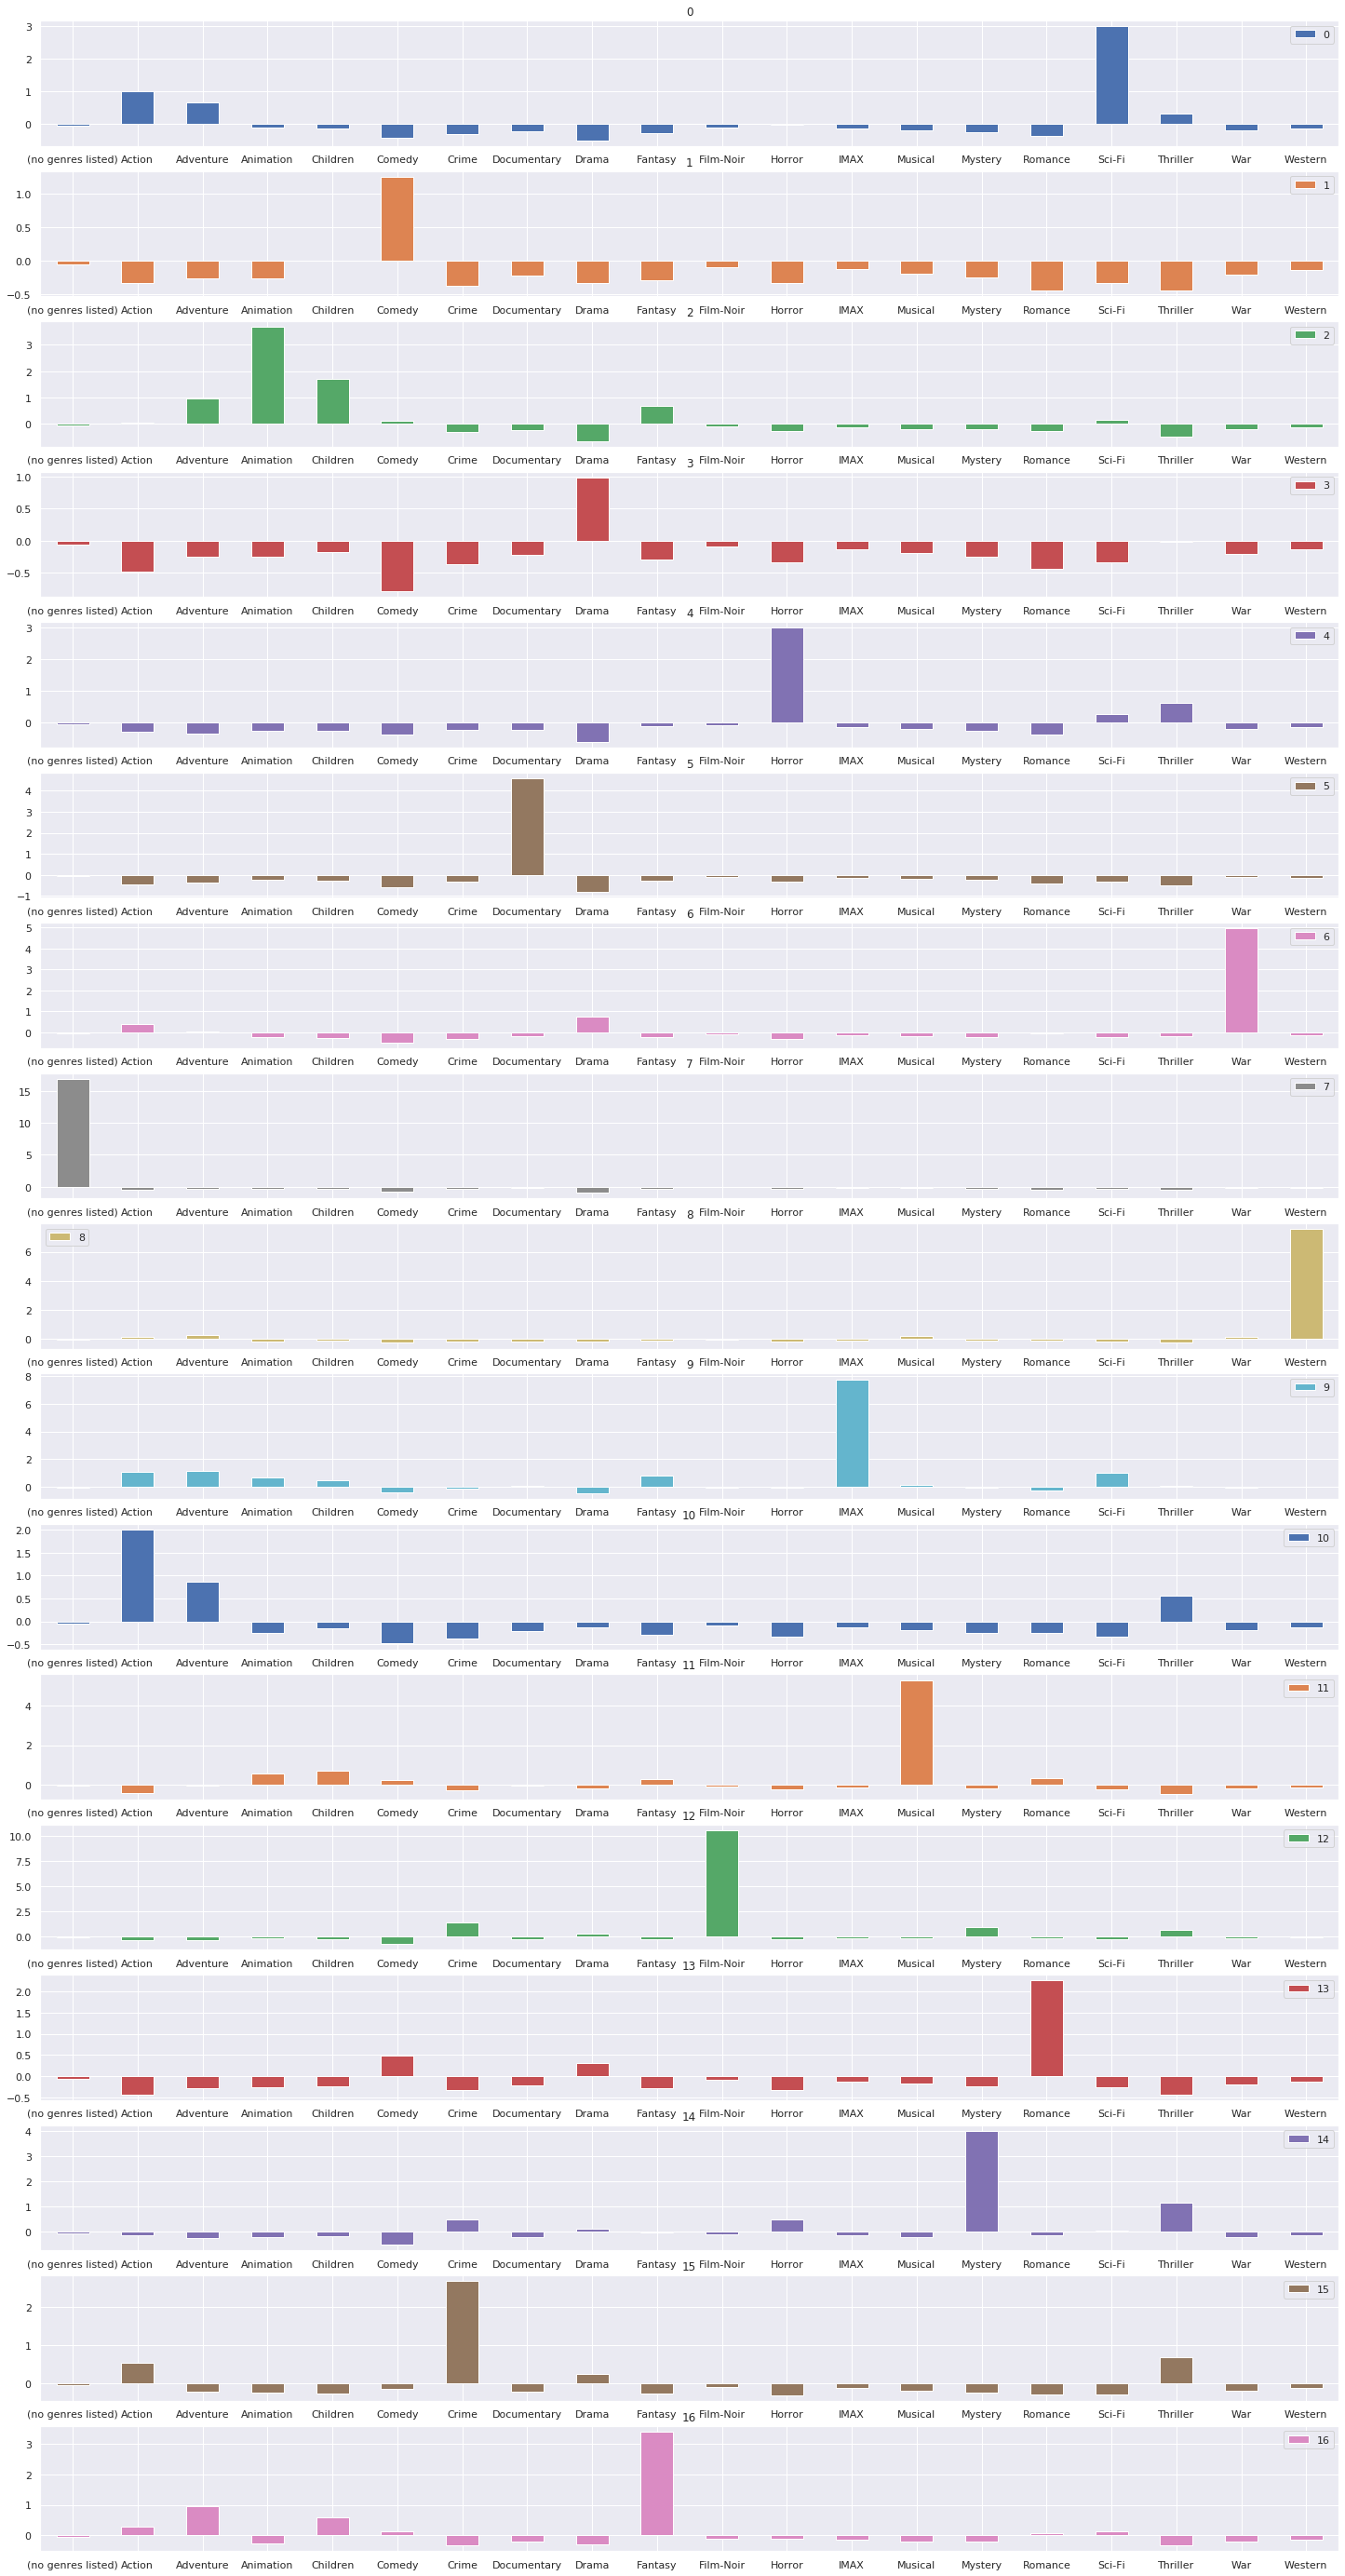

In [23]:

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0);

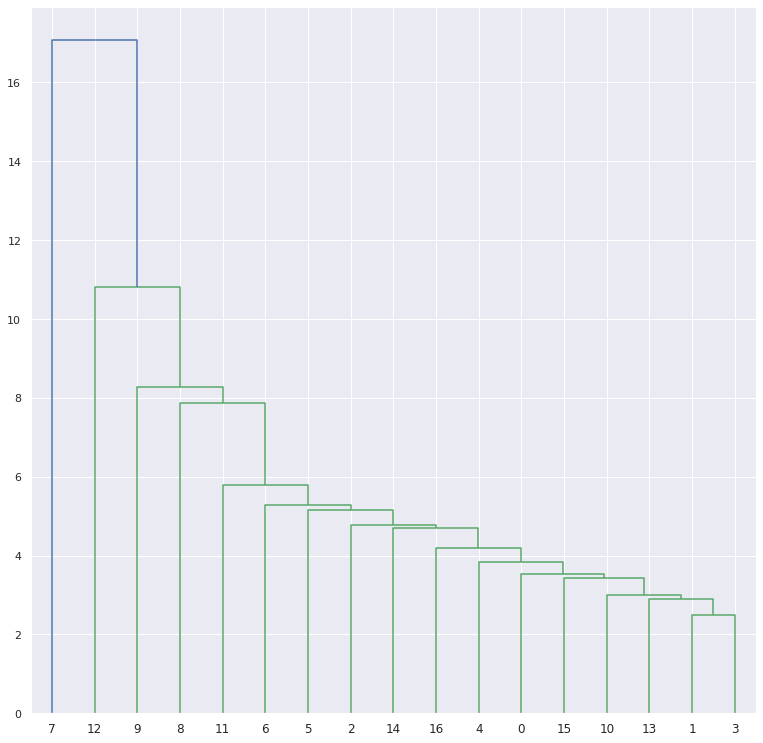

In [24]:
matriz_de_distancia = linkage(grupos)
dendrograma = dendrogram(matriz_de_distancia)